In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_regression

In [2]:
def _generate_phi(degree, data):
    phi = []
    
    for row in data:
        _phi_i = []
        for i in range(degree):
            _phi_i.append(row[0]**i)
    
        phi.append(_phi_i)
    
    return phi

Text(0.5,0,'x')

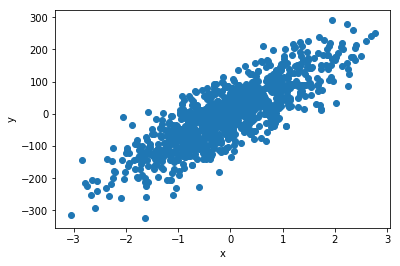

In [3]:
x, y = make_regression(n_samples=1000, n_features=1, n_informative=1, random_state=0, noise=55) 
plt.scatter(x, y)
plt.ylabel('y')
plt.xlabel('x')

# Solução Fechada

### Obs: Tomando que Phi é Full Rank e K+1 < N

In [4]:
_phi = _generate_phi(2, x)
print('Rank:',np.linalg.matrix_rank(_phi))


('Rank:', 2)


In [5]:
_phi_sqr_inv =  np.linalg.inv( np.dot(np.transpose(_phi), _phi) )
w = np.dot( np.dot( _phi_sqr_inv, np.transpose(_phi) ),  y)

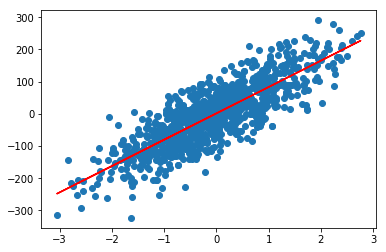

In [6]:
plt.scatter(x,y)
plt.plot(x, np.dot(_phi ,w), 'r')
plt.show()

In [7]:
w.shape

(2,)

# Interative Method
## Gradient Descend

In [8]:
def calculate_error(phi,y,w):

    y_pred = np.dot(phi, w)
    cost = (1/2.0*len(y)) * np.sum( np.square(y_pred - y) ) 
    return cost
    

In [13]:
def gradient_descent(phi, y, alpha, n_iter ):
    error_hist = []
    w_hist = []
    # Generate initial weights
    w = []
    
    for i in range(len(_phi[0])):
        w.append(np.random.uniform(10**-6, 10**2))
        print("Initial W:{}".format(w))
    w = np.array(w)
    error = calculate_error(phi, y, w)
    
    w_hist.append(w)
    error_hist.append(error)
    
    converged = False
    
    for iter in range(n_iter):
        
        predictions = np.dot(phi, w)
        cost = (predictions - y) * 1/len(y)
        
        w = w - alpha * np.dot(np.transpose(phi), cost)        
        error = calculate_error(phi, y, w)
        
        w_hist.append(w)
        error_hist.append(error)
        
        converged = True if error < 10**-6 else False
        
        if converged: break
        
    return w, w_hist, error_hist
    

Initial W:[77.73171959330682]
Initial W:[77.73171959330682, 94.65442809012313]
1
1


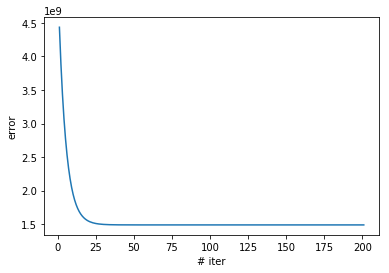

In [14]:
n_iter = 200
w, w_hist, error_hist = gradient_descent(_phi, y, 0.1, n_iter)

iters = np.arange(1,n_iter + 2)
plt.xlabel('# iter')
plt.ylabel('error')
plt.plot(iters, error_hist)

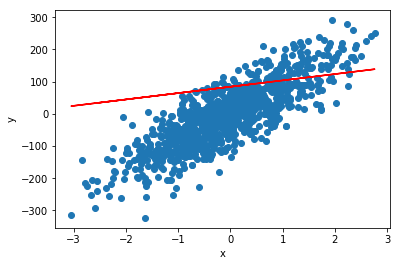

In [11]:
# First iter

plt.scatter(x,y)
plt.plot(x, np.dot(_phi ,w_hist[0]), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


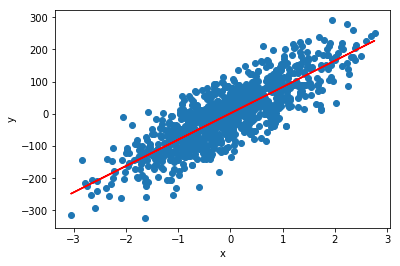

In [12]:
# Last iter

plt.scatter(x,y)
plt.plot(x, np.dot(_phi ,w_hist[-1]), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()